## Step 1: Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Setting visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

## Step 2: Load and Explore the Dataset:

In [7]:
# Loading the dataset
df = pd.read_csv('car data.csv')
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [8]:
# Displaying dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [9]:
# Displaying basic statistics
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [10]:
# Checking for missing values
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [11]:
# Checking unique values in categorical columns
categorical_cols = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"Top 5: {df[col].value_counts().head().index.tolist()}")
    

Car_Name: 98 unique values
Top 5: ['city', 'corolla altis', 'verna', 'fortuner', 'brio']
Fuel_Type: 3 unique values
Top 5: ['Petrol', 'Diesel', 'CNG']
Selling_type: 2 unique values
Top 5: ['Dealer', 'Individual']
Transmission: 2 unique values
Top 5: ['Manual', 'Automatic']
Owner: 3 unique values
Top 5: [0, 1, 3]


## Step 3: Data Visualization:

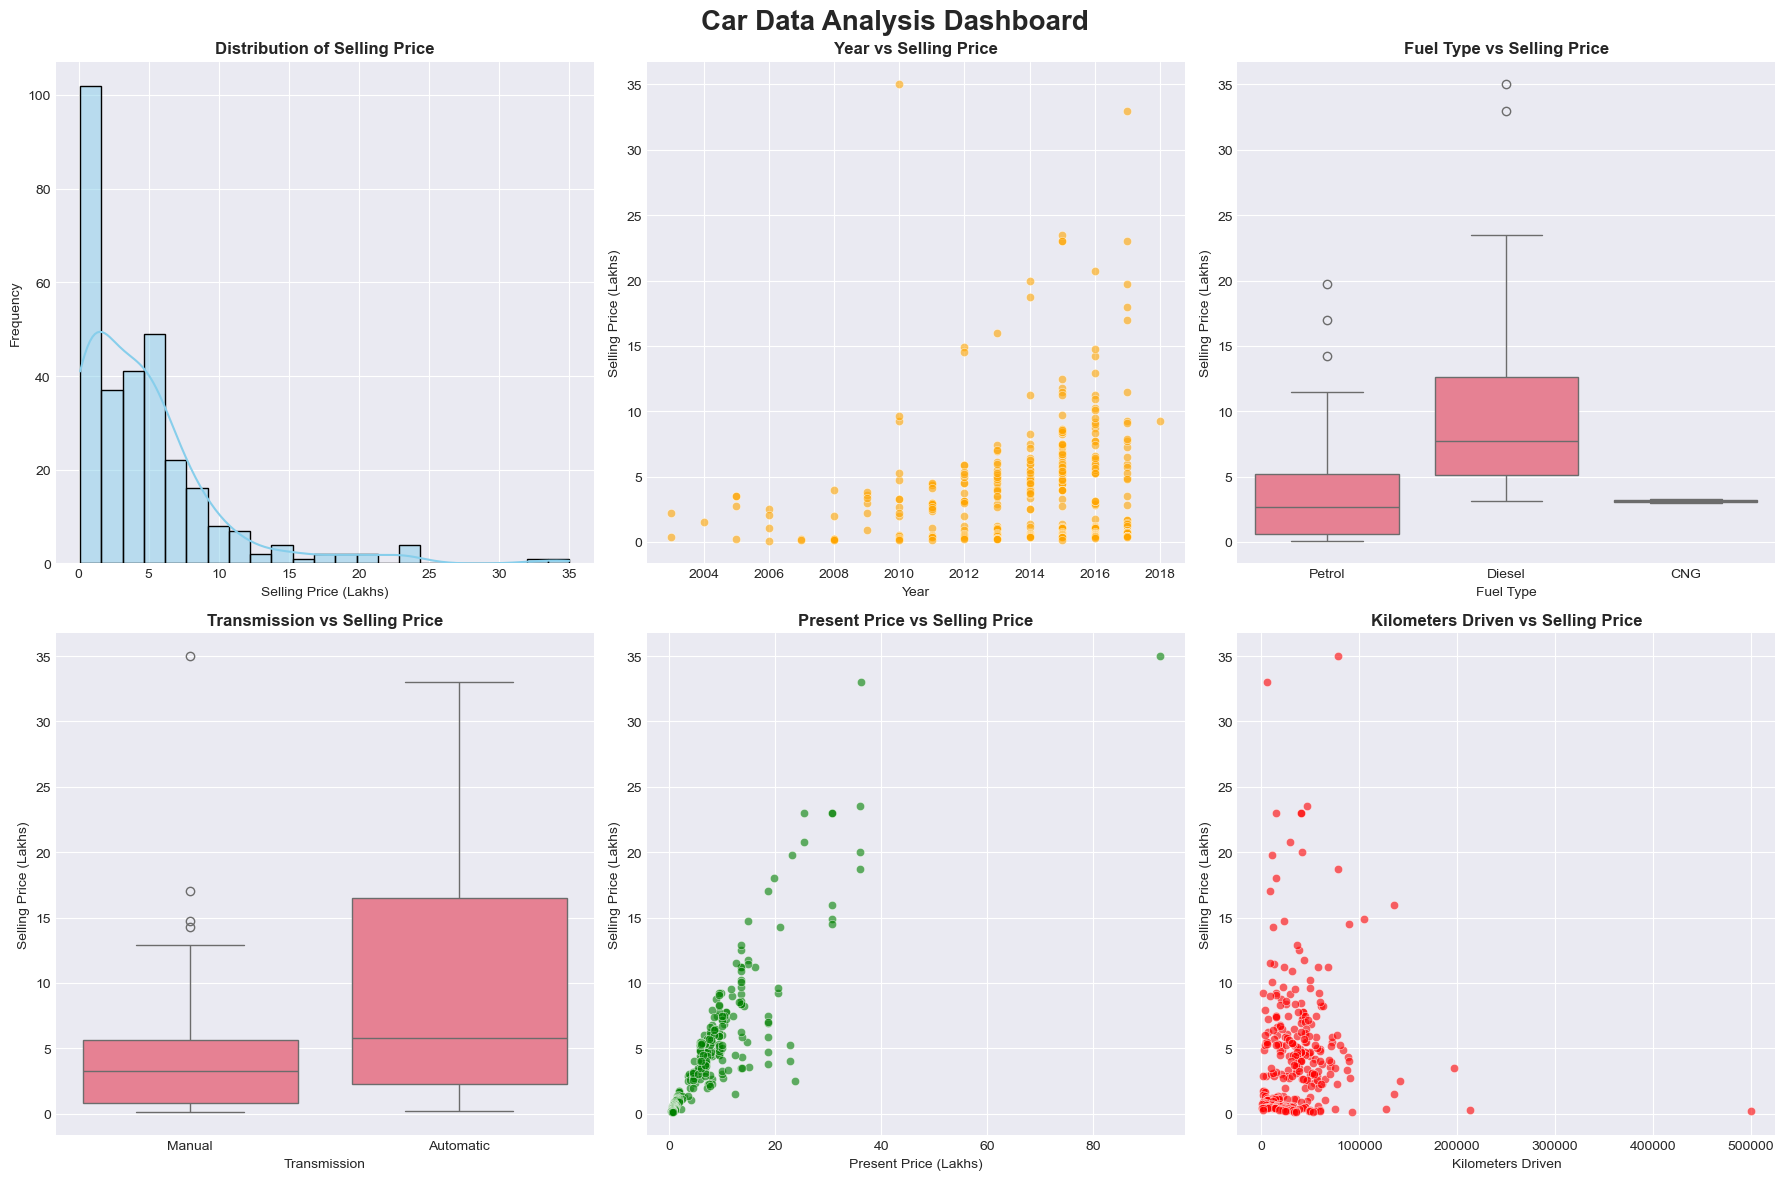

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Car Data Analysis Dashboard', fontsize=20, fontweight='bold')

# Plot 1: Distribution of Selling Price
sns.histplot(df['Selling_Price'], kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribution of Selling Price', fontweight='bold')
axes[0,0].set_xlabel('Selling Price (Lakhs)')
axes[0,0].set_ylabel('Frequency')

# Plot 2: Year vs Selling Price
sns.scatterplot(x='Year', y='Selling_Price', data=df, ax=axes[0,1], alpha=0.6, color='orange')
axes[0,1].set_title('Year vs Selling Price', fontweight='bold')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Selling Price (Lakhs)')

# Plot 3: Fuel Type vs Selling Price
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, ax=axes[0,2])
axes[0,2].set_title('Fuel Type vs Selling Price', fontweight='bold')
axes[0,2].set_xlabel('Fuel Type')
axes[0,2].set_ylabel('Selling Price (Lakhs)')

# Plot 4: Transmission vs Selling Price
sns.boxplot(x='Transmission', y='Selling_Price', data=df, ax=axes[1,0])
axes[1,0].set_title('Transmission vs Selling Price', fontweight='bold')
axes[1,0].set_xlabel('Transmission')
axes[1,0].set_ylabel('Selling Price (Lakhs)')

# Plot 5: Present Price vs Selling Price
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, ax=axes[1,1], alpha=0.6, color='green')
axes[1,1].set_title('Present Price vs Selling Price', fontweight='bold')
axes[1,1].set_xlabel('Present Price (Lakhs)')
axes[1,1].set_ylabel('Selling Price (Lakhs)')

# Plot 6: Driven_kms vs Selling Price
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df, ax=axes[1,2], alpha=0.6, color='red')
axes[1,2].set_title('Kilometers Driven vs Selling Price', fontweight='bold')
axes[1,2].set_xlabel('Kilometers Driven')
axes[1,2].set_ylabel('Selling Price (Lakhs)')

plt.tight_layout()
plt.show()

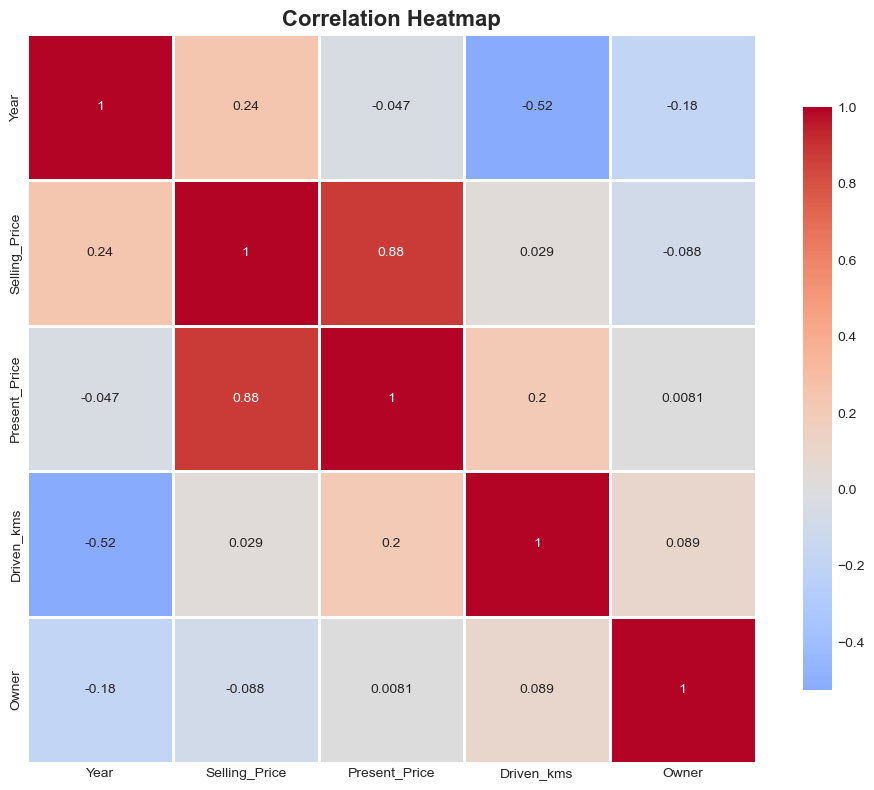

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 4: Data Preprocessing:

In [17]:
df_processed = df.copy()

# Step 1: Feature Engineering 
df_processed['Car_Age'] = 2023 - df_processed['Year'] 
print(f" Car Age Range: {df_processed['Car_Age'].min()} to {df_processed['Car_Age'].max()} years")

 Car Age Range: 5 to 20 years


In [15]:
# Step 2: Drop original Year column
df_processed = df_processed.drop('Year', axis=1)

In [18]:
# Step 3: Extract brand from Car_Name
df_processed['Brand'] = df_processed['Car_Name'].apply(lambda x: x.split()[0])
print(f" Extracted brand names: {df_processed['Brand'].nunique()} unique brands")

 Extracted brand names: 44 unique brands


In [19]:
# Getting top brands 
top_brands = df_processed['Brand'].value_counts().head(10).index
df_processed['Brand'] = df_processed['Brand'].apply(lambda x: x if x in top_brands else 'Other')
print(f" Reduced to {df_processed['Brand'].nunique()} categories")

 Reduced to 11 categories


In [22]:
# Step 4: Drop original Car_Name
# df_processed = df_processed.drop('Car_Name', axis=1)

# Step 5: Encode categorical variables
label_encoders = {}
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand']

for feature in categorical_features:
    le = LabelEncoder()
    df_processed[feature] = le.fit_transform(df_processed[feature])
    label_encoders[feature] = le
   
print(df_processed.head())

   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0  2014           3.35           5.59       27000          2             0   
1  2013           4.75           9.54       43000          1             0   
2  2017           7.25           9.85        6900          2             0   
3  2011           2.85           4.15        5200          2             0   
4  2014           4.60           6.87       42450          1             0   

   Transmission  Owner  Car_Age  Brand  
0             1      0        9      3  
1             1      0       10      3  
2             1      0        6      3  
3             1      0       12      3  
4             1      0        9      3  


## Step 5: Split Data into Features and Target:

In [23]:
X = df_processed.drop('Selling_Price', axis=1)
y = df_processed['Selling_Price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Features shape: (301, 9)
Target shape: (301,)


## Step 6: Feature Scaling:

In [25]:
scaler = StandardScaler()

numerical_cols = ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age']

X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(" Numerical features have been standardized")
print(f"  Columns scaled: {numerical_cols}")

 Numerical features have been standardized
  Columns scaled: ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age']


## Step 7: Train and Evaluate Model:

In [26]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Model R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Model R² Score: 0.9631
Mean Absolute Error: 0.6073


## Step 8: Saving Model:

In [28]:
import joblib
joblib.dump({
    'model': model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_columns': list(X.columns)
}, 'car_price_model.pkl')

print("Model saved successfully!")

Model saved successfully!
